<a href="https://colab.research.google.com/github/NC25/gym_fishing/blob/master/fishing-v0/PPO2__plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

PPO is an on-policy algorithim and learns directly from what the agent encounters in the environment. In contrast, off-policy, e.g DQN, uses offline experience (the replay buffer) to update gradients.

PPO had improved sample-effeciecy and hyperparamter stability compared totraditional policy gradient methods. The PPO returns an estimated value function that contains noise (variance in the estimates).


# Dependencies

In [ ]:
%tensorflow_version 1.x
!apt-get install ffmpeg freeglut3-dev xvfb  # For visualization
!pip install stable-baselines[mpi]==2.10.0

# Packaging

In [ ]:
!git clone https://github.com/boettiger-lab/gym_fishing.git
!python gym_fishing/setup.py sdist bdist_wheel
!pip install -e ./gym_fishing/
!ls
!cd gym_fishing

# Remove Warnings

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
import tensorflow as tf
tf.get_logger().setLevel('INFO')
tf.autograph.set_verbosity(0)
import logging
tf.get_logger().setLevel(logging.ERROR)

# Imports

In [4]:
import gym_fishing
import pandas as pd
import gym
import numpy as np

from stable_baselines import PPO2
from stable_baselines.common.policies import MlpPolicy

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# Environment and Training

In [6]:
env = gym.make('fishing-v0')
model = PPO2(MlpPolicy, env , verbose=2)

Wrapping the env in a DummyVecEnv.


In [ ]:
trained_model = model.learn(total_timesteps=10000)


# Saving and Loading

In [8]:
save_dir = '/path/sb/'
os.makedirs(save_dir, exist_ok=True)

In [9]:
trained_model.save(save_dir + "PPO2_fishing-v0")

In [10]:
#del trained_model

#trained_model = PPO2.load(save_dir + "PPO2_fishing-v0")

# Driver 

In [11]:
def driver(trained_model, num_episodes, num_timesteps):
   obs = env.reset()
   y = []
   total_rewards = []
   all_rewards = []
   for i in range(num_episodes):
     action, _states = trained_model.predict(obs)
     obs, rewards, dones, info = env.step(action)
     y.append(action)
     total_rewards.append(rewards)
     all_rewards.append(sum(total_rewards))
   def get_action():
       return y
   def get_reward():
       return all_rewards
   get_action()
   get_reward()
   env.render()
   env.close()


   #def plot_action():
   x = np.linspace(0, num_episodes, num_episodes)
   fig, ax = plt.subplots()  # Create a figure and an axes. 
   ax.scatter(x, get_action())
   ax.set_xlabel('Episodes')
   ax.set_ylabel('Harvest')

    
   #def plot_reward():
   x = np.linspace(0, num_timesteps, num_timesteps)
   fig, bx = plt.subplots()  # Create a figure and an axes.
   bx.plot(x, get_reward(), label='linear')
   bx.set_xlabel('Timesteps')
   ax.set_ylabel('Cumulative Reward')

  

   







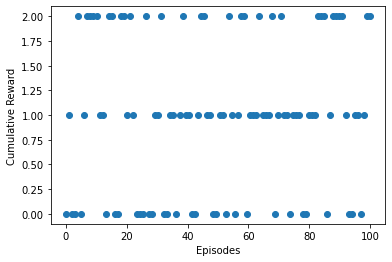

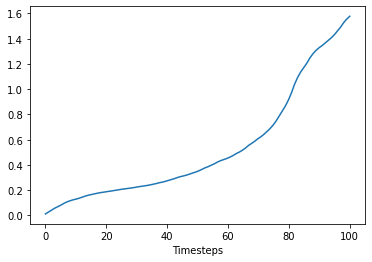

In [12]:
driver(trained_model, 100, 100)
